## Linear regression, multiple linear regression, L1 & L2 Regularization 

In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import statsmodels.api as sm 
from sklearn.model_selection import cross_val_score, GridSearchCV

%matplotlib inline 

### Simple linear regression model 

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/marcopeix/datasciencewithmarco/master/data/Advertising.csv', index_col = 0) # use first column as index
data.head(5)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


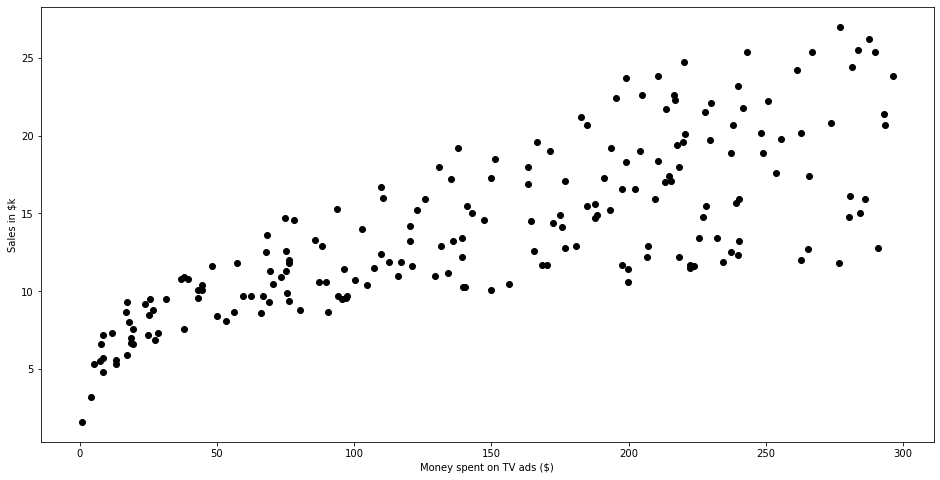

In [3]:
plt.figure(figsize = (16,8))
plt.scatter(data['TV'], data['sales'], c = 'black')
plt.xlabel('Money spent on TV ads ($)')
plt.ylabel('Sales in $k')
plt.show()

In [4]:
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X,y)

print(f'The linear model is: \n Y = {reg.intercept_[0]} + {reg.coef_[0][0]}*TV')

The linear model is: 
 Y = 7.032593549127693 + 0.047536640433019764*TV


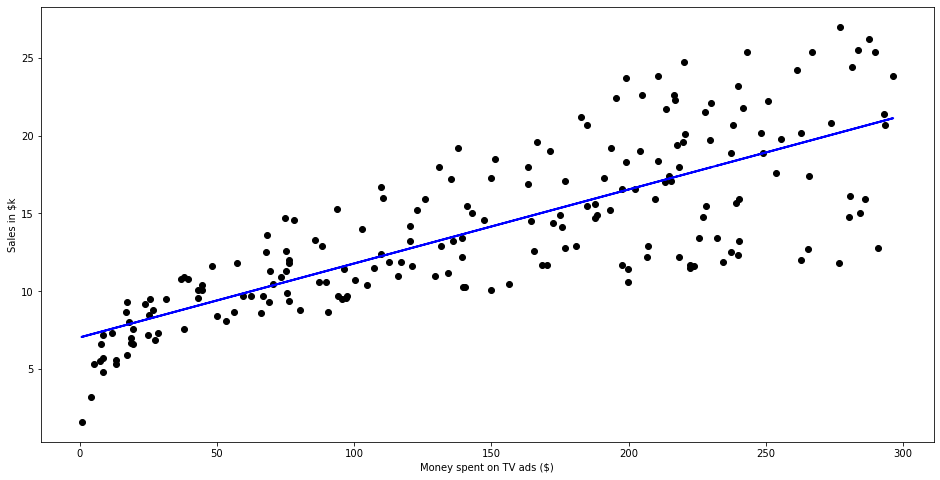

In [5]:
predictions = reg.predict(X) 

plt.figure(figsize= (16,8))
plt.scatter(X, y, c= 'black')
plt.plot(X, predictions, c = 'blue', linewidth = 2)
plt.xlabel('Money spent on TV ads ($)')
plt.ylabel('Sales in $k')
plt.show()

In [6]:
X = data['TV']
y = data['sales']

exog = sm.add_constant(X)
est = sm.OLS(y, exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 30 Apr 2022   Prob (F-statistic):           1.47e-42
Time:                        00:10:23   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

Analysis: 
- R^2 is 0.612; not good but fair; 61.2% of variability is explained 
- F- statistic is 312.1 which is >> 1; model is kind of good
- P value is less than 0.05 which means that the feature is relevant 

### Multiple linear regression 

In [7]:
Xs = data.drop(['sales'], axis = 1) ## axis = 1 are columns; axis = 0 are rows
y = data['sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(Xs, y)

print(f'The linear model is: \n Y = {reg.intercept_[0]} + {reg.coef_[0][0]}*TV + {reg.coef_[0][1]}*radio + {reg.coef_[0][2]}*newspaper')

The linear model is: 
 Y = 2.9388893694594085 + 0.045764645455397615*TV + 0.18853001691820456*radio + -0.0010374930424763272*newspaper


In [8]:
X = np.column_stack((data['TV'], data['radio'], data['newspaper']))
#X = data[['TV' ,'radio', 'newspaper']]
y = data['sales'].values.reshape(-1, 1)

exog = sm.add_constant(X)
est = sm.OLS(y, exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 30 Apr 2022   Prob (F-statistic):           1.58e-96
Time:                        00:10:23   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

Analysis: 
- R^2 is 0.897; 89.7% of the variability is explained 
- F- statistic is 570.3 which is >> 1; model is good
- P value is less than 0.05 which means that the feature is relevant EXCEPT for newspaper 
    - p value 0.860 >> 0.05 means that newspaper is NOT relevant in this model; take it out 

## Resampling and regularization 

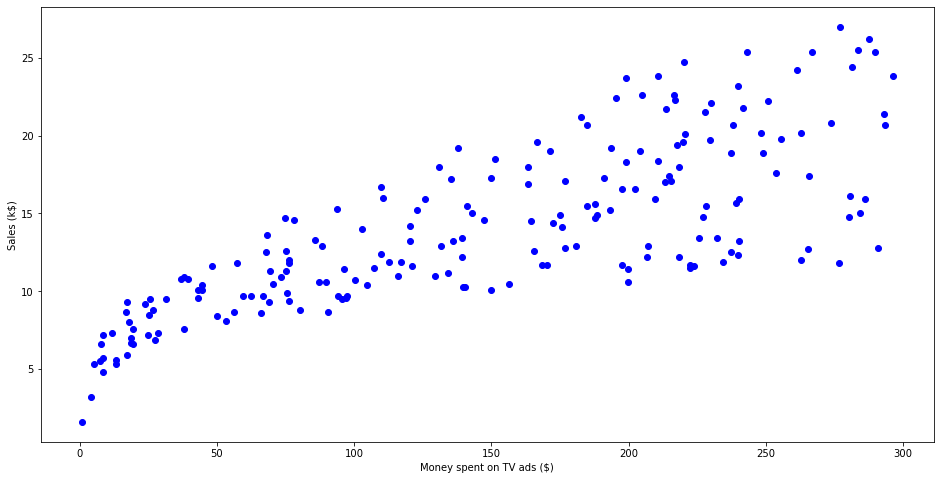

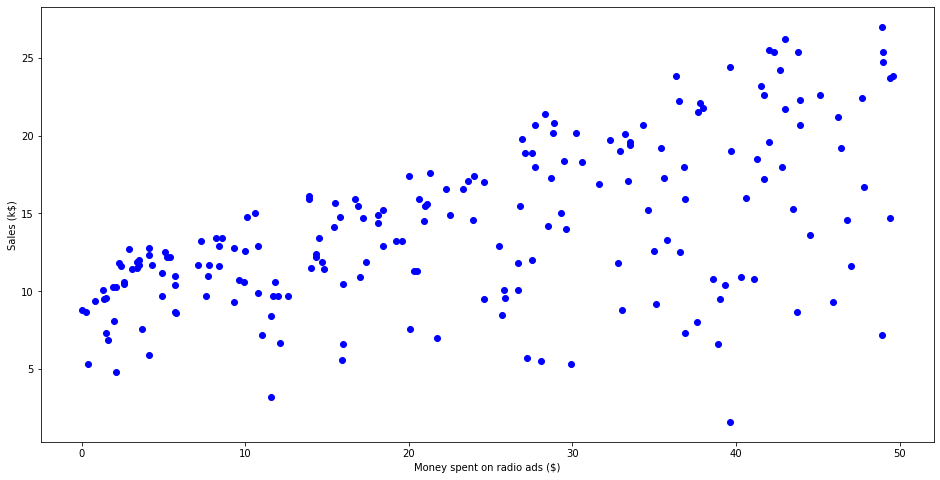

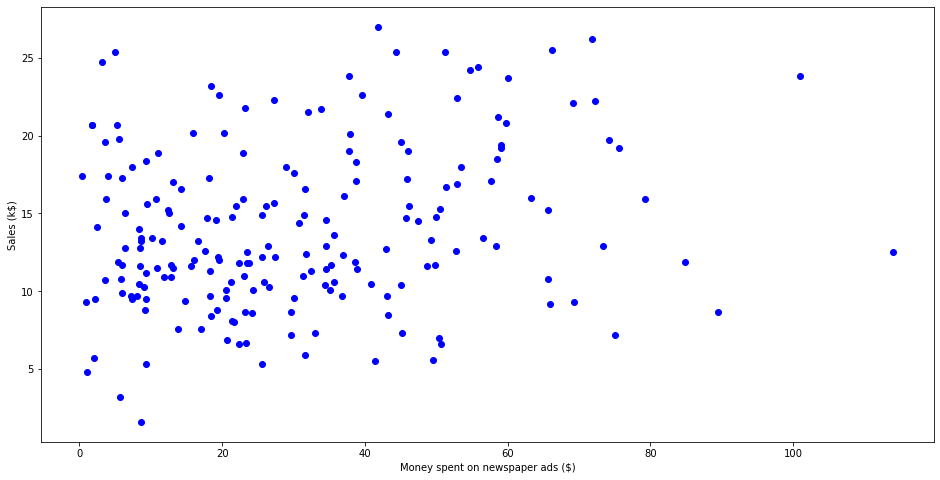

In [12]:
def scatter_plot(df): 
    t = ['TV', 'radio', 'newspaper']
    for feature in (data[t]): 
        plt.figure(figsize= (16,8))
        plt.scatter(data[feature], data['sales'], c= 'blue')
        plt.xlabel(f'Money spent on {feature} ads ($)')
        plt.ylabel('Sales (k$)')
        plt.show()

scatter_plot(data)

### Baselining model 
- multiple linear regression with cross validation where k = 5

In [19]:
Xs = data.drop(['sales'], axis = 1) ## axis = 1 are columns; axis = 0 are rows
# define feature vector which will be everything but the sales 
y = data['sales'].values.reshape(-1,1)

In [20]:
lin_reg = LinearRegression()

mses = cross_val_score(lin_reg, Xs, y, scoring = 'neg_mean_squared_error', cv = 5)
mean_mse = np.mean(mses)
print(-mean_mse)

3.072946597100209


Mean squared error (MSE) or mean squared deviation (MSD) shows how close a regression is to set of points 
- lower the MSE, the better the model 

### Regularization (L2 | Ridge Regression)

In [23]:
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20]}

ridge_processor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv = 5)
ridge_processor.fit(Xs, y)

print(ridge_processor.best_params_)
print(-ridge_processor.best_score_)

{'alpha': 20}
3.072671338341143


Alpha is lambda
- list of possible values for tuning parameter 
- values can be as many as you desire
- use cv to validate to find which is the best

L2 appears to have a slightly lower MSE compared to baseline 

### Regularization (L1 | Lasso)

In [26]:
lasso = Lasso(tol = 0.05)
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(Xs, y)

print(lasso_regressor.best_params_)
print(-lasso_regressor.best_score_)

{'alpha': 1}
3.0359983209111925


L1 appears to be slightly better compared to baseline 